# **Question 2:**
First I import the needed libraries, and the CIFAR-10 dataset from Keras as below:

In [1]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.3 MB/s 


In [2]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
import tensorflow_addons as tfa
from keras.utils.np_utils import to_categorical 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


The labels in the CIFAR-10 dataset are numbers, so I use a dictionary to convert them to the names of their classes as below:

In [4]:
label_names = {0 : 'airplane',
               1 : 'automobile',
               2 : 'bird',
               3 : 'cat',
               4 : 'deer',
               5: 'dog',
               6: 'frog',
               7: 'horse',
               8: 'ship',
               9: 'truck'}

Visualizing the first 10 pictures in the dataset:

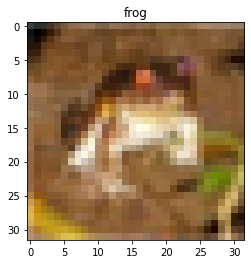

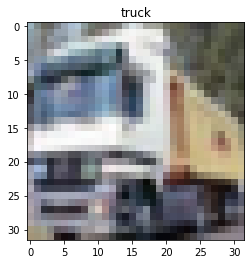

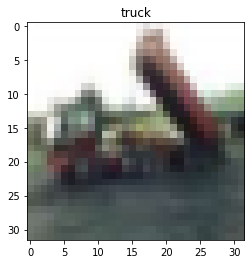

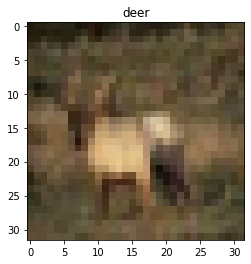

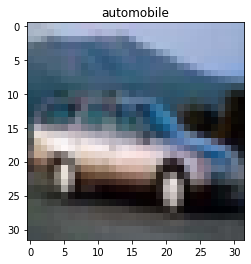

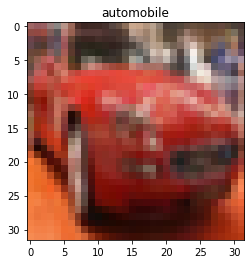

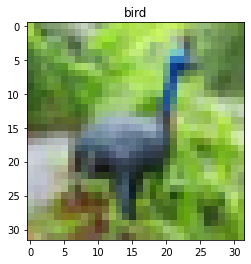

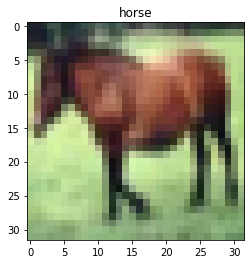

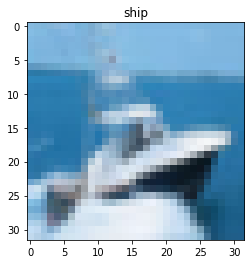

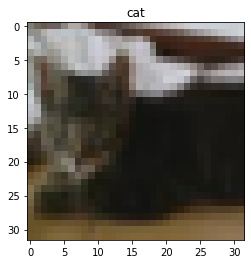

In [ ]:
for i in range(10):
    pyplot.imshow(x_train[i])
    pyplot.title(label_names[int(y_train[i])])
    pyplot.show()

Transforming images from (32,32,3) to 3072-dimensional vectors (32x32x3), and Normalization of pixel values to [0-1] range to make the calculations faster:

In [5]:
y_train = to_categorical(y_train, num_classes=10)
x_train = np.reshape(x_train,(50000,3072))
x_train = x_train.astype('float32')
x_train /= 255

y_test = to_categorical(y_test, num_classes=10)
x_test = np.reshape(x_test,(10000,3072))
x_test = x_test.astype('float32')
x_test /= 255

In this model, I set the default parameters as below according to the question:

optimizer: stochastic gradient descent

number of hidden layers: 2

Other hyperparameters like the loss function and the learning rate were found with trial and error as below:

loss function = categorical_crossentropy
learning rate = 0.01

I also used momentum (0.9) to improve my results.



# 1) 

Testing the model with different batch sizes (32, 64, and 256)

Activation functions:
ReLU, ReLU, Softmax

Model with **Batch Size = 32:**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3046 - accuracy: 0.5327 - val_loss: 1.4206 - val_accuracy: 0.4960
Epoch 2/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2925 - accuracy: 0.5337 - val_loss: 1.4665 - val_accuracy: 0.4834
Epoch 3/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2840 - accuracy: 0.5392 - val_loss: 1.5338 - val_accuracy: 0.4718
Epoch 4/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2690 - accuracy: 0.5459 - val_loss: 1.4962 - val_accuracy: 0.4848
Epoch 5/10
1407/1407 [==============================] - 14s 10ms/step - loss: 1.2549 - accuracy: 0.5493 - val_loss: 1.5907 - val_accuracy: 0.4642
Epoch 6/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2420 - accuracy: 0.5543 - val_loss: 1.4878 - val_accuracy: 0.4866
Epoch 7/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2345 - accuracy: 0.5556 - val_loss: 1.4967 - val_a

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.5028975009918213, 0.4781000018119812]


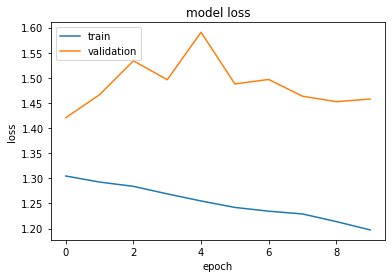

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

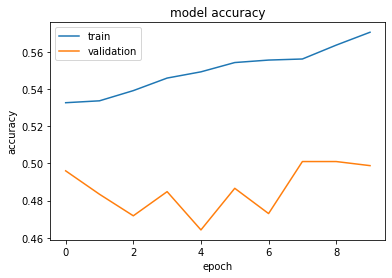

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As it can be seen, the accuracy is about 0.48 and each epoch takes about 13 seconds to train.

**Batch Size = 64:**

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 8s 11ms/step - loss: 1.0594 - accuracy: 0.6184 - val_loss: 1.4140 - val_accuracy: 0.5160
Epoch 2/10
704/704 [==============================] - 8s 12ms/step - loss: 1.0343 - accuracy: 0.6254 - val_loss: 1.4380 - val_accuracy: 0.5220
Epoch 3/10
704/704 [==============================] - 8s 11ms/step - loss: 1.0189 - accuracy: 0.6317 - val_loss: 1.4475 - val_accuracy: 0.5186
Epoch 4/10
704/704 [==============================] - 8s 11ms/step - loss: 1.0045 - accuracy: 0.6393 - val_loss: 1.4879 - val_accuracy: 0.5162
Epoch 5/10
704/704 [==============================] - 8s 11ms/step - loss: 0.9960 - accuracy: 0.6400 - val_loss: 1.4861 - val_accuracy: 0.5156
Epoch 6/10
704/704 [==============================] - 8s 12ms/step - loss: 0.9820 - accuracy: 0.6448 - val_loss: 1.4966 - val_accuracy: 0.5090
Epoch 7/10
704/704 [==============================] - 8s 11ms/step - loss: 0.9641 - accuracy: 0.6505 - val_loss: 1.4678 - val_accuracy: 0.5216

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.5775173902511597, 0.49720001220703125]


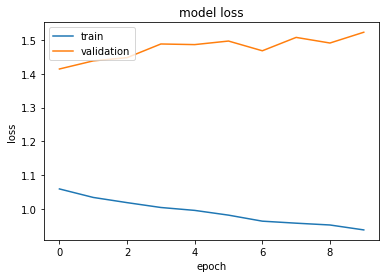

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

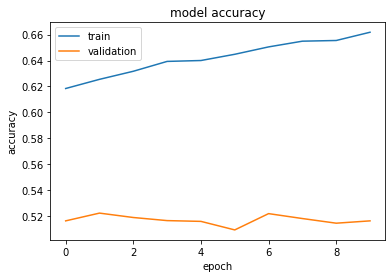

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As it can be seen, the accuracy is about 0.50 and each epoch takes about 8 seconds to train.

**Batch Size = 256:**

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 5s 26ms/step - loss: 0.8277 - accuracy: 0.7050 - val_loss: 1.4758 - val_accuracy: 0.5308
Epoch 2/10
176/176 [==============================] - 4s 25ms/step - loss: 0.7908 - accuracy: 0.7180 - val_loss: 1.4586 - val_accuracy: 0.5368
Epoch 3/10
176/176 [==============================] - 5s 26ms/step - loss: 0.7806 - accuracy: 0.7227 - val_loss: 1.4896 - val_accuracy: 0.5306
Epoch 4/10
176/176 [==============================] - 4s 25ms/step - loss: 0.7717 - accuracy: 0.7263 - val_loss: 1.5035 - val_accuracy: 0.5316
Epoch 5/10
176/176 [==============================] - 4s 25ms/step - loss: 0.7645 - accuracy: 0.7288 - val_loss: 1.4930 - val_accuracy: 0.5282
Epoch 6/10
176/176 [==============================] - 4s 25ms/step - loss: 0.7571 - accuracy: 0.7310 - val_loss: 1.5010 - val_accuracy: 0.5318
Epoch 7/10
176/176 [==============================] - 4s 25ms/step - loss: 0.7521 - accuracy: 0.7340 - val_loss: 1.5175 - val_accuracy: 0.5326

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.6027008295059204, 0.5156999826431274]


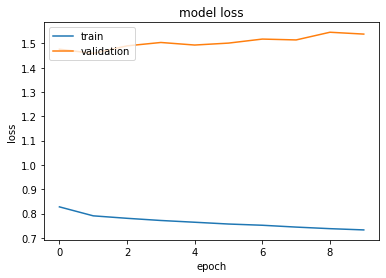

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

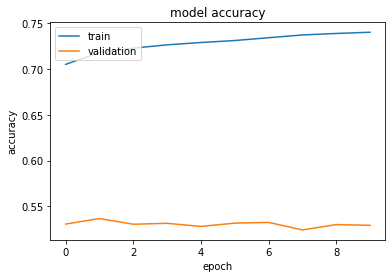

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As it can be seen, the accuracy is about 0.51 and each epoch takes about 4 seconds to train. So, the best results happen with the maximum batch size (256). The model is faster and has a better accuracy compared to the other 2 models.

# 2)
Having the batch size fixed to **256**, and testing the model with different activation functions:

Activation functions:
**eLU, eLU, Softmax**



In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='elu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='elu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy','Recall', 'Precision'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 4s 8ms/step - loss: 1.8660 - accuracy: 0.3385 - recall: 0.0684 - precision: 0.6294 - val_loss: 1.7801 - val_accuracy: 0.3740 - val_recall: 0.1200 - val_precision: 0.6098
Epoch 2/10
176/176 [==============================] - 1s 6ms/step - loss: 1.6911 - accuracy: 0.4062 - recall: 0.1330 - precision: 0.6547 - val_loss: 1.6444 - val_accuracy: 0.4316 - val_recall: 0.1496 - val_precision: 0.6727
Epoch 3/10
176/176 [==============================] - 1s 6ms/step - loss: 1.6073 - accuracy: 0.4350 - recall: 0.1782 - precision: 0.6724 - val_loss: 1.6154 - val_accuracy: 0.4352 - val_recall: 0.1874 - val_precision: 0.6613
Epoch 4/10
176/176 [==============================] - 1s 6ms/step - loss: 1.5563 - accuracy: 0.4538 - recall: 0.2044 - precision: 0.6736 - val_loss: 1.6076 - val_accuracy: 0.4352 - val_recall: 0.2228 - val_precision: 0.6469
Epoch 5/10
176/176 [==============================] - 1s 6ms/step - loss: 1.5162 - accuracy: 0.4687 - re

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[1.4254016876220703, 0.4961000084877014, 0.2992999851703644, 0.685995876789093]


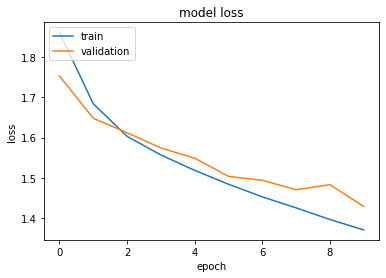

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

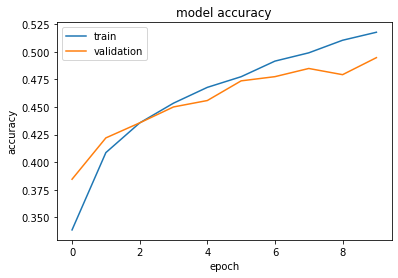

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


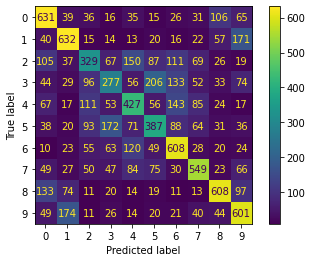

In [8]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

As it can be seen, the accuracy is about 0.496 which means the elu activation function is worse than the relu activation function.

Activation functions: **tanh, tanh, Softmax**

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='tanh', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='tanh'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics= ['accuracy', 'Recall', 'Precision'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 2s 8ms/step - loss: 1.8520 - accuracy: 0.3436 - recall: 0.0666 - precision: 0.6527 - val_loss: 1.7652 - val_accuracy: 0.3760 - val_recall: 0.1120 - val_precision: 0.6243
Epoch 2/10
176/176 [==============================] - 1s 6ms/step - loss: 1.6779 - accuracy: 0.4098 - recall: 0.1336 - precision: 0.6748 - val_loss: 1.6558 - val_accuracy: 0.4110 - val_recall: 0.1432 - val_precision: 0.6710
Epoch 3/10
176/176 [==============================] - 1s 6ms/step - loss: 1.5979 - accuracy: 0.4376 - recall: 0.1757 - precision: 0.6856 - val_loss: 1.6003 - val_accuracy: 0.4412 - val_recall: 0.1802 - val_precision: 0.6694
Epoch 4/10
176/176 [==============================] - 1s 7ms/step - loss: 1.5495 - accuracy: 0.4524 - recall: 0.2028 - precision: 0.6892 - val_loss: 1.5631 - val_accuracy: 0.4482 - val_recall: 0.2012 - val_precision: 0.6592
Epoch 5/10
176/176 [==============================] - 1s 6ms/step - loss: 1.5075 - accuracy: 0.4656 - re

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[1.3625621795654297, 0.517300009727478, 0.37439998984336853, 0.669767439365387]


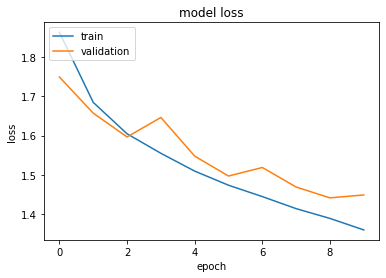

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

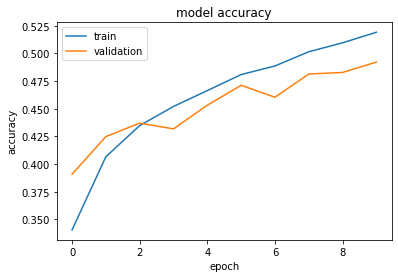

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


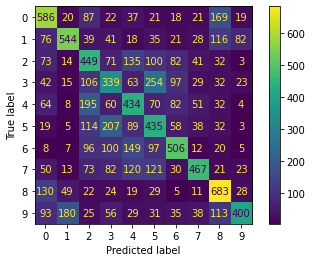

In [11]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

As it can be seen, the accuracy is about 0.517 which means the tanh activation function is worse than the relu activation function.

Activation functions: **sigmoid, sigmoid, Softmax**

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='sigmoid', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics= ['accuracy', 'Recall', 'Precision'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 2s 8ms/step - loss: 2.2483 - accuracy: 0.1878 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 2.1595 - val_accuracy: 0.2148 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
176/176 [==============================] - 1s 6ms/step - loss: 2.0852 - accuracy: 0.2612 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 2.0302 - val_accuracy: 0.2778 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/10
176/176 [==============================] - 1s 6ms/step - loss: 1.9811 - accuracy: 0.2942 - recall: 0.0018 - precision: 0.6103 - val_loss: 1.9509 - val_accuracy: 0.3116 - val_recall: 0.0038 - val_precision: 0.7037
Epoch 4/10
176/176 [==============================] - 1s 6ms/step - loss: 1.9226 - accuracy: 0.3161 - recall: 0.0121 - precision: 0.6190 - val_loss: 1.9137 - val_accuracy: 0.3132 - val_recall: 0.0132 - val_precision: 0.6600
Epoch 5/10
176/176 [==============================] - 1s 5ms/step - loss

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[1.7721840143203735, 0.3783000111579895, 0.07540000230073929, 0.6904761791229248]


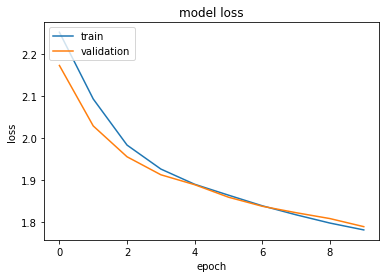

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

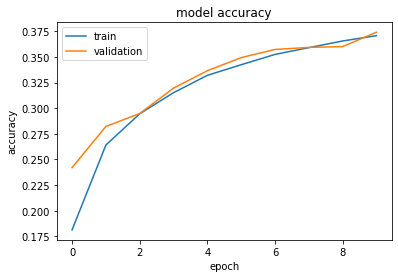

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


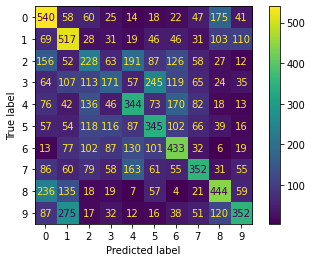

In [14]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

As it can be seen, the accuracy is about 0.317 which means the sigmoid activation function is worse than the relu activation function.

So, it can be concluded that the relu activation function is better than all the other choices.

Comparing different activation functions:

**Sigmoid:** y values react very little to the changes in x. The derivative values in these regions are very small and converge to 0 (the vanishing gradient), and the learning is minimal. When slow learning occurs, the optimization algorithm that minimizes error can be attached to local minimum values and cannot get maximum performance from the artificial neural network model.

**Tanh:** It has a structure very similar to Sigmoid function. However, this time the function is defined as (-1, + 1). The advantage over the sigmoid function is that its derivative is more steep, which means it can get more value. This means that it will be more efficient because it has a wider range for faster learning and grading. But again, the problem of gradients at the ends of the function continues.

**ReLU:** ReLU is valued at [0, + go], in a large neural network with too many neurons, some of the neurons in the network are active, and activation is infrequent, so we want an efficient computational load. We get it with ReLU. Having a value of 0 on the negative axis means that the network will run faster. The fact that the calculation load is less than the sigmoid and hyperbolic tangent functions has led to a higher preference for multi-layer networks. However, because of the zero value region, learning is not happening in that area, which is not good.

# 3)

Having the batch size fixed to **256**, and testing the model with different loss functions:

Loss Function: **MeanSquaredError**

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='MeanSquaredError', metrics=['accuracy', 'Recall', 'Precision'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 2s 8ms/step - loss: 0.0889 - accuracy: 0.1754 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.0870 - val_accuracy: 0.2324 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
176/176 [==============================] - 1s 6ms/step - loss: 0.0857 - accuracy: 0.2540 - recall: 4.4444e-05 - precision: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.2702 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/10
176/176 [==============================] - 1s 6ms/step - loss: 0.0835 - accuracy: 0.2882 - recall: 0.0031 - precision: 0.7650 - val_loss: 0.0827 - val_accuracy: 0.2962 - val_recall: 0.0056 - val_precision: 0.6222
Epoch 4/10
176/176 [==============================] - 1s 7ms/step - loss: 0.0819 - accuracy: 0.3120 - recall: 0.0134 - precision: 0.7383 - val_loss: 0.0814 - val_accuracy: 0.3160 - val_recall: 0.0188 - val_precision: 0.6395
Epoch 5/10
176/176 [==============================] - 2s 10ms/step - loss: 0

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[0.07181203365325928, 0.4275999963283539, 0.15690000355243683, 0.6960958242416382]


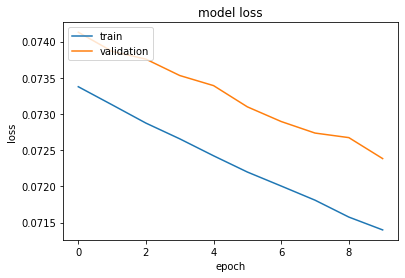

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

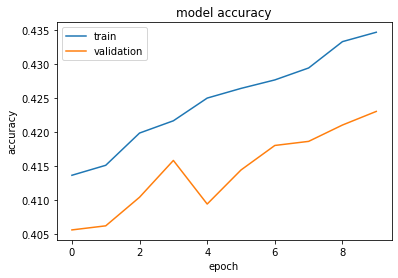

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


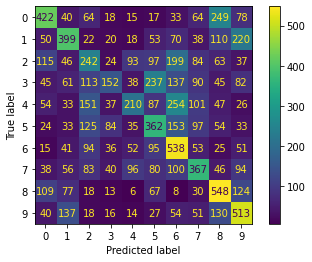

In [17]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

As it can be seen, the accuracy is about 0.427 which means the MSE loss function is worse than the categorical_crossentropy loss function.

Loss Function: **Hinge Loss**

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='hinge', metrics=['accuracy', 'Recall', 'Precision'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 2s 8ms/step - loss: 1.0777 - accuracy: 0.1331 - recall: 0.0015 - precision: 0.2290 - val_loss: 1.0745 - val_accuracy: 0.1842 - val_recall: 0.0010 - val_precision: 0.7143
Epoch 2/10
176/176 [==============================] - 1s 6ms/step - loss: 1.0700 - accuracy: 0.1831 - recall: 0.0700 - precision: 0.3084 - val_loss: 1.0656 - val_accuracy: 0.1950 - val_recall: 0.1284 - val_precision: 0.3133
Epoch 3/10
176/176 [==============================] - 2s 9ms/step - loss: 1.0639 - accuracy: 0.2061 - recall: 0.1384 - precision: 0.2926 - val_loss: 1.0612 - val_accuracy: 0.2208 - val_recall: 0.1556 - val_precision: 0.2915
Epoch 4/10
176/176 [==============================] - 2s 11ms/step - loss: 1.0597 - accuracy: 0.2340 - recall: 0.1625 - precision: 0.3106 - val_loss: 1.0577 - val_accuracy: 0.2478 - val_recall: 0.1768 - val_precision: 0.3117
Epoch 5/10
176/176 [==============================] - 2s 10ms/step - loss: 1.0561 - accuracy: 0.2561 - 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[1.0489553213119507, 0.2745000123977661, 0.2558000087738037, 0.2932477295398712]


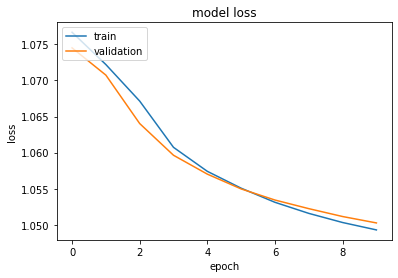

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

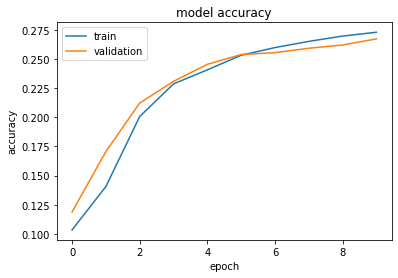

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


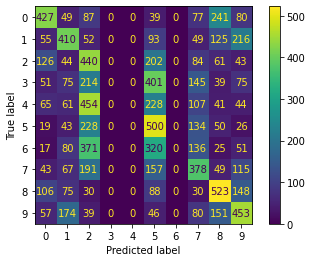

In [20]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

As it can be seen, the accuracy is about 0.274 which means the Hinge loss function is worse than the categorical_crossentropy loss function.

So, it can be concluded that the best loss function is the categorical_crossentropy loss.

# 4)

Having the batch size fixed to **256**, and testing the model with different optimizers:

Optimizer = **Adam**:

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Recall', 'Precision'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 7s 29ms/step - loss: 1.9297 - accuracy: 0.3031 - recall: 0.0459 - precision: 0.6099 - val_loss: 1.7801 - val_accuracy: 0.3712 - val_recall: 0.0652 - val_precision: 0.6494
Epoch 2/10
176/176 [==============================] - 5s 26ms/step - loss: 1.7102 - accuracy: 0.3893 - recall: 0.1218 - precision: 0.6355 - val_loss: 1.6809 - val_accuracy: 0.4018 - val_recall: 0.1396 - val_precision: 0.6439
Epoch 3/10
176/176 [==============================] - 5s 26ms/step - loss: 1.6268 - accuracy: 0.4197 - recall: 0.1694 - precision: 0.6472 - val_loss: 1.6143 - val_accuracy: 0.4266 - val_recall: 0.1828 - val_precision: 0.6352
Epoch 4/10
176/176 [==============================] - 5s 27ms/step - loss: 1.5616 - accuracy: 0.4450 - recall: 0.2020 - precision: 0.6706 - val_loss: 1.6010 - val_accuracy: 0.4278 - val_recall: 0.2038 - val_precision: 0.6183
Epoch 5/10
176/176 [==============================] - 5s 27ms/step - loss: 1.5151 - accuracy: 0.4618

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[1.437760829925537, 0.49470001459121704, 0.30970001220703125, 0.663879930973053]


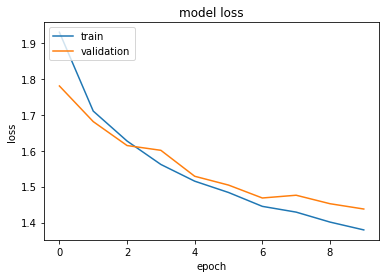

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

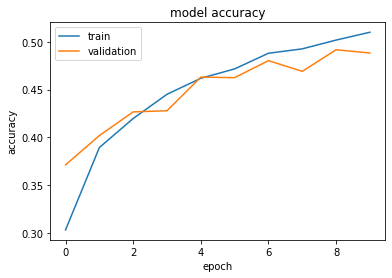

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As it can be seen, the accuracy is about 0.494 which means the Adam optimizer is worse than the stochastic gradient descent optimizer.

Optimizer = **RMSprop:**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 7s 38ms/step - loss: 2.2313 - accuracy: 0.2298 - val_loss: 1.9769 - val_accuracy: 0.2738
Epoch 2/10
176/176 [==============================] - 5s 31ms/step - loss: 1.8875 - accuracy: 0.3202 - val_loss: 1.9112 - val_accuracy: 0.3114
Epoch 3/10
176/176 [==============================] - 5s 30ms/step - loss: 1.7871 - accuracy: 0.3580 - val_loss: 1.7629 - val_accuracy: 0.3634
Epoch 4/10
176/176 [==============================] - 5s 29ms/step - loss: 1.7242 - accuracy: 0.3838 - val_loss: 1.7147 - val_accuracy: 0.3822
Epoch 5/10
176/176 [==============================] - 5s 29ms/step - loss: 1.6763 - accuracy: 0.3998 - val_loss: 1.7522 - val_accuracy: 0.3710
Epoch 6/10
176/176 [==============================] - 5s 31ms/step - loss: 1.6342 - accuracy: 0.4190 - val_loss: 1.6712 - val_accuracy: 0.4002
Epoch 7/10
176/176 [==============================] - 5s 30ms/step - loss: 1.6010 - accuracy: 0.4300 - val_loss: 1.6316 - val_accuracy: 0.4108

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.554749608039856, 0.4456000030040741]


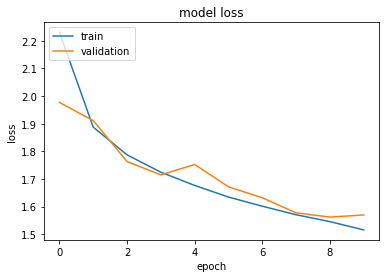

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

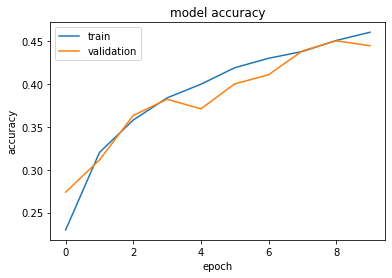

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As it can be seen, the accuracy is about 0.445 which means the RMSprop optimizer is worse than the stochastic gradient descent optimizer.

According to the above results, the best model has the parameters as below:

batch size = 256

optimizer: SGD

Loss Function: categorical class entropy

Activation Functions: ReLU, ReLU, Softmax

Getting the results of this model as below:

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy', 'Recall', 'Precision'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [23]:
history = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 1s 6ms/step - loss: 1.4826 - accuracy: 0.4758 - recall: 0.2362 - precision: 0.6984 - val_loss: 1.5076 - val_accuracy: 0.4698 - val_recall: 0.2430 - val_precision: 0.6709
Epoch 2/20
176/176 [==============================] - 1s 6ms/step - loss: 1.4425 - accuracy: 0.4915 - recall: 0.2590 - precision: 0.7028 - val_loss: 1.5062 - val_accuracy: 0.4640 - val_recall: 0.2350 - val_precision: 0.6916
Epoch 3/20
176/176 [==============================] - 1s 6ms/step - loss: 1.4065 - accuracy: 0.5050 - recall: 0.2775 - precision: 0.7116 - val_loss: 1.4699 - val_accuracy: 0.4956 - val_recall: 0.2480 - val_precision: 0.7102
Epoch 4/20
176/176 [==============================] - 1s 6ms/step - loss: 1.3770 - accuracy: 0.5133 - recall: 0.2947 - precision: 0.7156 - val_loss: 1.4169 - val_accuracy: 0.5060 - val_recall: 0.2780 - val_precision: 0.7088
Epoch 5/20
176/176 [==============================] - 1s 6ms/step - loss: 1.3467 - accuracy: 0.5246 - re

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[1.3674399852752686, 0.5289999842643738, 0.3971000015735626, 0.6564721465110779]


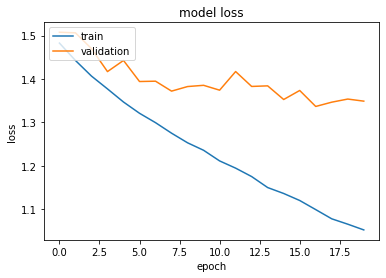

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

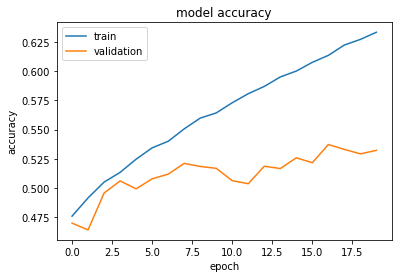

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


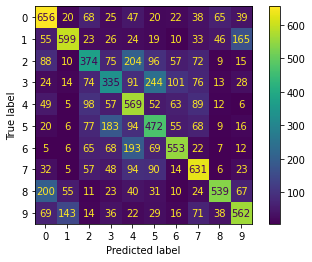

In [27]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

Calculating the **F1 score**, **precision** and **recall** on test data:

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)

F1 = f1_score(y_true, y_predict, average='weighted')
print('F1 Score = ', F1)

precision = precision_score(y_true, y_predict, average='weighted')
print('Precision Score = ', precision)

313/313 [==============================] - 1s 2ms/step
F1 Score =  0.5298009011267364
Precision Score =  0.5394033772373297


# **Part B: CNN+MLP**
# 1)

Adding 3 convolutional layers to the beginning of the previous model:

In [34]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
x_train = x_train.astype('float32')
x_train /= 255

y_test = to_categorical(y_test, num_classes=10)
x_test = x_test.astype('float32')
x_test /= 255

In [36]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy', 'Recall', 'Precision'])
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 6s 28ms/step - loss: 1.8482 - accuracy: 0.3349 - recall: 0.0762 - precision: 0.6334 - val_loss: 1.6051 - val_accuracy: 0.4398 - val_recall: 0.1666 - val_precision: 0.6750
Epoch 2/10
176/176 [==============================] - 4s 23ms/step - loss: 1.4880 - accuracy: 0.4704 - recall: 0.2331 - precision: 0.6847 - val_loss: 1.4082 - val_accuracy: 0.4970 - val_recall: 0.3188 - val_precision: 0.6734
Epoch 3/10
176/176 [==============================] - 4s 23ms/step - loss: 1.3345 - accuracy: 0.5254 - recall: 0.3199 - precision: 0.7106 - val_loss: 1.2950 - val_accuracy: 0.5432 - val_recall: 0.3266 - val_precision: 0.7245
Epoch 4/10
176/176 [==============================] - 4s 24ms/step - loss: 1.2011 - accuracy: 0.5745 - recall: 0.3947 - precision: 0.7380 - val_loss: 1.1832 - val_accuracy: 0.5734 - val_recall: 0.4186 - val_precision: 0.7212
Epoch 5/10
176/176 [==============================] - 4s 23ms/step - loss: 1.0743 - accuracy: 0.6180

In [37]:
score = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(score)

313/313 [==============================] - 2s 5ms/step - loss: 1.2585 - accuracy: 0.6283 - recall: 0.5888 - precision: 0.6755
['loss', 'accuracy', 'recall', 'precision']
[1.258492350578308, 0.6283000111579895, 0.5888000130653381, 0.6755392551422119]


As we see from the above results, the accuracy on the train data is 0.80, but the accuracy on test data is 0.62, which means the model is overfitting on the train data.

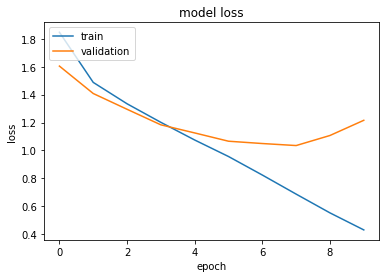

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

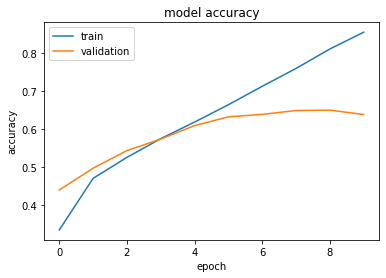

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


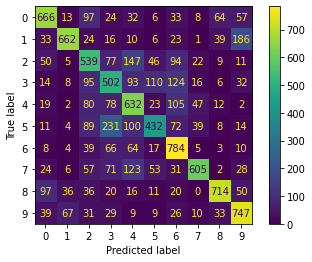

In [40]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

By comparing the results to the MLP model, we can see that the accuracy of the model is overall increasing and the loss is decreasing, however, it can be seen that the model is overfitting.

# 2)

**Batch Normalization Layers:** Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

**Max Pooling Layers:** Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. The pooling layer summarises the features present in a region of the feature map generated by a convolution layer. So, further operations are performed on summarised features instead of precisely positioned features generated by the convolution layer. This makes the model more robust to variations in the position of the features in the input image. 

**Adding batch normalization and pooling:**

In [41]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
x_train = x_train.astype('float32')
x_train /= 255

y_test = to_categorical(y_test, num_classes=10)
x_test = x_test.astype('float32')
x_test /= 255

In [59]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy', 'Recall', 'Precision'])
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 4s 16ms/step - loss: 1.4885 - accuracy: 0.4697 - recall: 0.2697 - precision: 0.6725 - val_loss: 2.3991 - val_accuracy: 0.2330 - val_recall: 0.0640 - val_precision: 0.4923
Epoch 2/10
176/176 [==============================] - 2s 12ms/step - loss: 1.0974 - accuracy: 0.6126 - recall: 0.4722 - precision: 0.7524 - val_loss: 1.7406 - val_accuracy: 0.4056 - val_recall: 0.2404 - val_precision: 0.5316
Epoch 3/10
176/176 [==============================] - 2s 12ms/step - loss: 0.9197 - accuracy: 0.6782 - recall: 0.5670 - precision: 0.7923 - val_loss: 1.6773 - val_accuracy: 0.5000 - val_recall: 0.4098 - val_precision: 0.5859
Epoch 4/10
176/176 [==============================] - 2s 12ms/step - loss: 0.7755 - accuracy: 0.7308 - recall: 0.6411 - precision: 0.8192 - val_loss: 1.2650 - val_accuracy: 0.5774 - val_recall: 0.4872 - val_precision: 0.6793
Epoch 5/10
176/176 [==============================] - 2s 12ms/step - loss: 0.6554 - accuracy: 0.7714

In [60]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[1.5374517440795898, 0.6409000158309937, 0.6205999851226807, 0.6677426099777222]


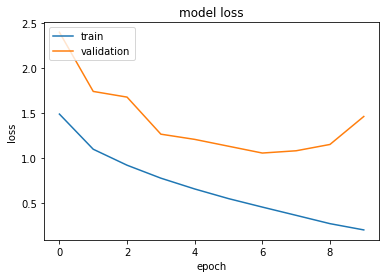

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

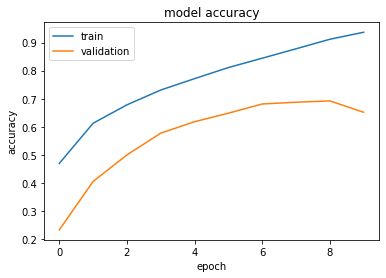

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


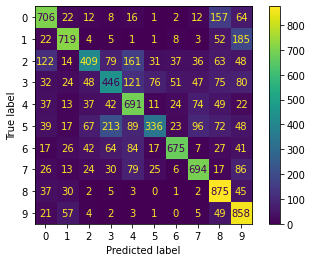

In [63]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

As it can be seen, by adding max pooling and batch normalization layers to the architecture, the accuracy of the model increases and the loss decreases. So, the overall model is improved.

# 3)

**Dropout Layers:**

Neural networks are likely to quickly overfit a training dataset with few examples. A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called **dropout** and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks of all kinds. Probabilistically dropping out nodes in the network is a simple and effective regularization method.

**Adding dropout layer to the model:**

In [56]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
x_train = x_train.astype('float32')
x_train /= 255

y_test = to_categorical(y_test, num_classes=10)
x_test = x_test.astype('float32')
x_test /= 255

In [57]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy', 'Recall', 'Precision'])
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 4s 16ms/step - loss: 1.5960 - accuracy: 0.4267 - recall: 0.2154 - precision: 0.6395 - val_loss: 2.3338 - val_accuracy: 0.2038 - val_recall: 0.0188 - val_precision: 0.5054
Epoch 2/10
176/176 [==============================] - 2s 11ms/step - loss: 1.2612 - accuracy: 0.5486 - recall: 0.3772 - precision: 0.7128 - val_loss: 1.8882 - val_accuracy: 0.3648 - val_recall: 0.1836 - val_precision: 0.5847
Epoch 3/10
176/176 [==============================] - 2s 11ms/step - loss: 1.1250 - accuracy: 0.5992 - recall: 0.4520 - precision: 0.7437 - val_loss: 1.2285 - val_accuracy: 0.5662 - val_recall: 0.4106 - val_precision: 0.7206
Epoch 4/10
176/176 [==============================] - 2s 11ms/step - loss: 1.0123 - accuracy: 0.6405 - recall: 0.5119 - precision: 0.7665 - val_loss: 1.1474 - val_accuracy: 0.6036 - val_recall: 0.4996 - val_precision: 0.7298
Epoch 5/10
176/176 [==============================] - 2s 11ms/step - loss: 0.9297 - accuracy: 0.6706

In [58]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[0.9303041100502014, 0.6761000156402588, 0.6092000007629395, 0.760834276676178]


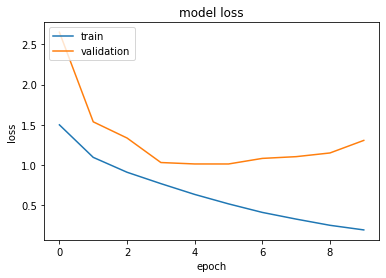

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

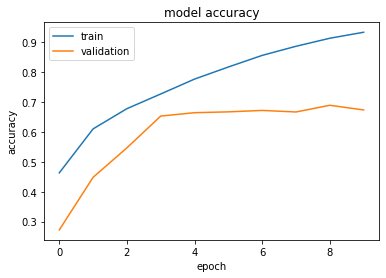

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


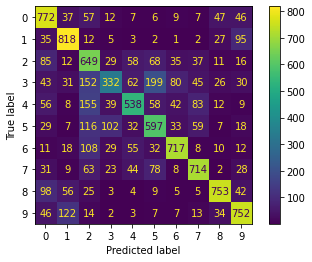

In [52]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

As it can be seen, by adding dropout layers to the architecture, the accuracy of the model increases and the loss decreases. So, the overall model is improved.

# 4)

**Early Stopping** is a regularization technique for deep neural networks that stops training when parameter updates no longer begin to yield improves on a validation set. In essence, we store and update the current best parameters during training, and when parameter updates no longer yield an improvement (after a set number of iterations) we stop training and use the last best parameters. It works as a regularizer by restricting the optimization procedure to a smaller volume of parameter space.

Once a scheme for evaluating the model is selected, a trigger for stopping the training process must be chosen. The trigger will use a monitored performance metric to decide when to stop training. This is often the performance of the model on the holdout dataset, such as the loss.

In the simplest case, training is stopped as soon as the performance on the validation dataset decreases as compared to the performance on the validation dataset at the prior training epoch (e.g. an increase in loss). More elaborate triggers may be required in practice. This is because the training of a neural network is stochastic and can be noisy. Plotted on a graph, the performance of a model on a validation dataset may go up and down many times. This means that the first sign of overfitting may not be a good place to stop training.

In [53]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
x_train = x_train.astype('float32')
x_train /= 255

y_test = to_categorical(y_test, num_classes=10)
x_test = x_test.astype('float32')
x_test /= 255

In [64]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=3072))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy','Recall', 'Precision'])
es = EarlyStopping(monitor='val_loss')
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
176/176 [==============================] - 6s 28ms/step - loss: 1.3864 - accuracy: 0.5048 - recall: 0.3407 - precision: 0.6757 - val_loss: 3.0704 - val_accuracy: 0.2146 - val_recall: 0.0990 - val_precision: 0.3076
Epoch 2/10
176/176 [==============================] - 4s 22ms/step - loss: 0.9253 - accuracy: 0.6740 - recall: 0.5672 - precision: 0.7823 - val_loss: 1.8479 - val_accuracy: 0.4250 - val_recall: 0.3030 - val_precision: 0.5523
Epoch 3/10
176/176 [==============================] - 4s 22ms/step - loss: 0.6629 - accuracy: 0.7705 - recall: 0.6978 - precision: 0.8443 - val_loss: 1.0991 - val_accuracy: 0.6248 - val_recall: 0.5478 - val_precision: 0.7065
Epoch 4/10
176/176 [==============================] - 4s 22ms/step - loss: 0.4486 - accuracy: 0.8470 - recall: 0.8026 - precision: 0.8935 - val_loss: 0.9869 - val_accuracy: 0.6792 - val_recall: 0.6352 - val_precision: 0.7359
Epoch 5/10
176/176 [==============================] - 4s 22ms/step - loss: 0.2565 - accuracy: 0.9179

In [65]:
score = model.evaluate(x_test, y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'recall', 'precision']
[1.5358768701553345, 0.7013000249862671, 0.692799985408783, 0.7123907208442688]


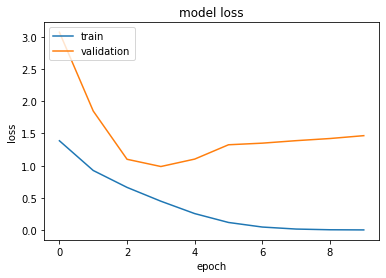

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

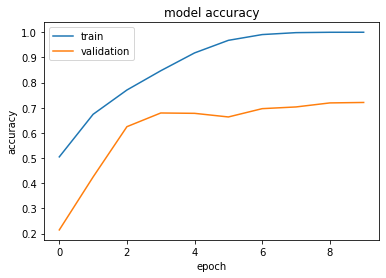

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


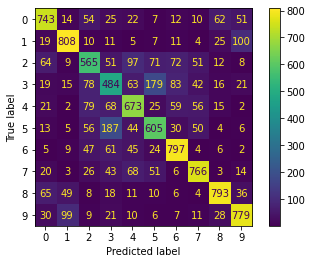

In [68]:
y_predict = model.predict(x_test)
y_predict = y_predict.argmax(axis=1)
y_true = y_test.argmax(axis=1)
result = confusion_matrix(y_true,y_predict)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix = result, display_labels=label_names)
conf_matrix.plot()
plt.show()

As it can be seen, by adding the early stopping layer to the architecture, the accuracy of the model increases and the loss decreases. So, the overall model is improved.

So, the overall best model in this problem is achieved, which has an accuracy of 0.70 on test data, and an accuracy of 0.99 on train data.